# EDA: DJI

Source: https://archive.ics.uci.edu/ml/datasets/dow+jones+index
Dr. Michael Brown, michael.brown '@' umuc.edu, University of Maryland University College

## Importing Packages

In [1]:
# Importing the nessary packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Loading the Data

In [2]:
# Reading the clean Dow Jones Index data set
dji = pd.read_csv('dji_clean')

## Exploring and Cleaning the data

In [3]:
# Coping the df for future use
dji1 = dji.copy()

In [4]:
# Converted 'date' from Dtype: object to Dtype: datetime64[ns]
dji['date'] = pd.to_datetime(dji['date'])

In [5]:
# Setting 'date' to index
dji = dji.set_index('date')

In [6]:
# A little bit of feature engineering 
dji['volatility'] = abs(dji['percent_change_price'])

In [7]:
dji.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,volatility
date,,,,,,,,,,,,,,,,
2011-01-07,1,AA,15.82,16.72,15.78,16.42,239655616,3.79267,-4.180567,1.462465e+08,16.71,15.97,-4.428490,26,0.182704,3.79267
2011-01-14,1,AA,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,2.396556e+08,16.19,15.79,-2.470660,19,0.187852,4.42849
2011-01-21,1,AA,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,2.429634e+08,15.87,16.13,1.638310,12,0.189994,2.47066
2011-01-28,1,AA,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,1.384285e+08,16.18,17.14,5.933250,5,0.185989,1.63831
2011-02-04,1,AA,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,1.513792e+08,17.33,17.37,0.230814,97,0.175029,5.93325


In [8]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2011-01-07 to 2011-06-24
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   open                                750 non-null    float64
 3   high                                750 non-null    float64
 4   low                                 750 non-null    float64
 5   close                               750 non-null    float64
 6   volume                              750 non-null    int64  
 7   percent_change_price                750 non-null    float64
 8   percent_change_volume_over_last_wk  750 non-null    float64
 9   previous_weeks_volume               750 non-null    float64
 10  next_weeks_open                     750 non-null    float64
 11  next_weeks_close          

In [9]:
# Dividing the Data by 'stocks'
AA = dji.query('stock == "AA"')
AXP = dji.query('stock == "AXP"')
BA = dji.query('stock == "BA"')
BAC = dji.query('stock == "BAC"')
CAT = dji.query('stock == "CAT"')
CSCO = dji.query('stock == "CSCO"')
CVX = dji.query('stock == "CVX"')
DD = dji.query('stock == "DD"')
DIS = dji.query('stock == "DIS"')
GE = dji.query('stock == "GE"')
HD = dji.query('stock == "HD"')
HPQ = dji.query('stock == "HPQ"')
IBM = dji.query('stock == "IBM"')
INTC = dji.query('stock == "INTC"')
JNJ = dji.query('stock == "JNJ"')
JPM = dji.query('stock == "JPM"')
KO = dji.query('stock == "KO"')
KRFT = dji.query('stock == "KRFT"')
MCD = dji.query('stock == "MCD"')
MMM = dji.query('stock == "MMM"')
MRK = dji.query('stock == "MRK"')
MSFT = dji.query('stock == "MSFT"')
PFE = dji.query('stock == "PFE"')
PG = dji.query('stock == "PG"')
T = dji.query('stock == "T"')
TRV = dji.query('stock == "TRV"')
UTX = dji.query('stock == "UTX"')
VZ = dji.query('stock == "VZ"')
WMT = dji.query('stock == "WMT"')
XOM = dji.query('stock == "XOM"')


In [10]:
dji_30 = [AA, AXP, BA, BAC, CAT, CSCO, CVX, DD, DIS, GE ,HD, HPQ, IBM, INTC, JNJ, JPM, KO, KRFT, MCD, MMM, MRK, MSFT, PFE, PG, T, TRV, UTX, VZ, WMT, XOM]
dji_30_tick = ['AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE' ,'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'KRFT', 'MCD', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'T', 'TRV', 'UTX', 'VZ', 'WMT', 'XOM']

## Analysing the Data

In [11]:
# Analysing the Dow Jone index
dji_avg_close_price = dji.groupby('stock')['close'].mean().sort_values(ascending=False)
dji_avg_close_price.head()

stock
IBM    163.1016
CAT    103.1520
CVX    101.1756
MMM     91.6980
UTX     84.0332
Name: close, dtype: float64

In [12]:
dji['close'].describe()

count    750.000000
mean      53.729267
std       32.788787
min       10.520000
25%       30.365000
50%       45.930000
75%       72.667500
max      170.580000
Name: close, dtype: float64

Text(0.5, 1.0, 'Average Closing Price Distribution')

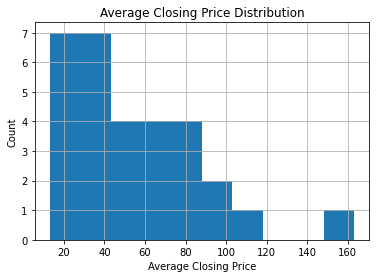

In [13]:
_ = dji_avg_close_price.hist()
plt.xlabel('Average Closing Price')
plt.ylabel('Count')
plt.title("Average Closing Price Distribution")

Most of the  mean stock price are under 120 with an expection on IBM at around 160

In [14]:
dji_avg_percent_change_price = dji.groupby('stock')['percent_change_price'].mean().sort_values(ascending=False)
dji_avg_percent_change_price.head()

stock
PFE     0.591685
IBM     0.587680
KRFT    0.544360
AXP     0.521029
DD      0.362452
Name: percent_change_price, dtype: float64

In [15]:
dji['percent_change_price'].describe()

count    750.000000
mean       0.050262
std        2.517809
min      -15.422900
25%       -1.288053
50%        0.000000
75%        1.650888
max        9.882230
Name: percent_change_price, dtype: float64

Text(0.5, 1.0, 'Average Percent Change Price')

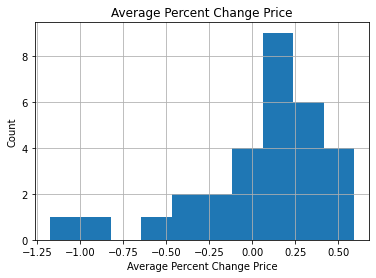

In [16]:
_ = dji_avg_percent_change_price.hist()
plt.xlabel('Average Percent Change Price')
plt.ylabel('Count')
plt.title("Average Percent Change Price")

In [17]:
dji_avg_volume = dji.groupby('stock')['volume'].mean().sort_values(ascending=False)
dji_avg_volume.head()

stock
BAC     7.229991e+08
CSCO    3.586616e+08
INTC    2.990224e+08
MSFT    2.896988e+08
GE      2.639381e+08
Name: volume, dtype: float64

In [18]:
dji['volume'].describe()

count    7.500000e+02
mean     1.175478e+08
std      1.584381e+08
min      9.718851e+06
25%      3.086624e+07
50%      5.306088e+07
75%      1.327218e+08
max      1.453439e+09
Name: volume, dtype: float64

Text(0.5, 1.0, 'Average Volume Distribution')

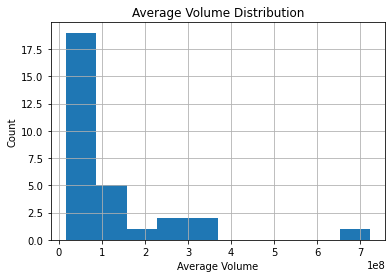

In [19]:
_ = dji_avg_volume.hist()
plt.xlabel('Average Volume')
plt.ylabel('Count')
plt.title("Average Volume Distribution")

In [20]:
dji_avg_percent_change_volume = dji.groupby('stock')['percent_change_volume_over_last_wk'].mean().sort_values(ascending=False)
dji_avg_percent_change_volume.head()

stock
HPQ     18.650169
CSCO    17.209924
MSFT     9.315518
KRFT     6.874799
DIS      6.792834
Name: percent_change_volume_over_last_wk, dtype: float64

In [21]:
dji['percent_change_volume_over_last_wk'].describe()

count    750.000000
mean       5.551939
std       39.741428
min      -61.433175
25%      -18.890959
50%        1.117281
75%       20.162880
max      327.408924
Name: percent_change_volume_over_last_wk, dtype: float64

Text(0.5, 1.0, 'Average Percent Change Volume Distribution')

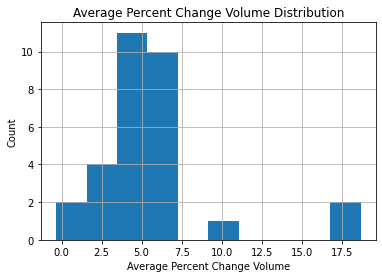

In [22]:
_ = dji_avg_percent_change_volume.hist()
plt.xlabel('Average Percent Change Volume')
plt.ylabel('Count')
plt.title("Average Percent Change Volume Distribution")

In [23]:
dji_avg_percent_return_next_dividend = dji.groupby('stock')['percent_return_next_dividend'].mean().sort_values(ascending=False)
dji_avg_percent_return_next_dividend.head()

stock
T      1.454386
VZ     1.344422
MRK    1.108387
PFE    1.011120
DIS    0.971693
Name: percent_return_next_dividend, dtype: float64

In [24]:
dji['percent_return_next_dividend'].describe()

count    750.000000
mean       0.691826
std        0.305482
min        0.065574
25%        0.534549
50%        0.681067
75%        0.854291
max        1.564210
Name: percent_return_next_dividend, dtype: float64

Text(0.5, 1.0, 'Average Percent Return Next Dividend Distribution')

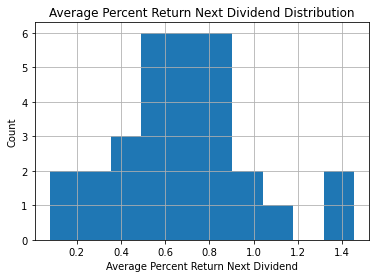

In [25]:
_ = dji_avg_percent_return_next_dividend.hist()
plt.xlabel('Average Percent Return Next Dividend')
plt.ylabel('Count')
plt.title("Average Percent Return Next Dividend Distribution")

In [26]:
dji_avg_volatility = dji.groupby('stock')['volatility'].mean().sort_values(ascending=False)
dji_avg_volatility.head()

stock
AA      2.937769
CAT     2.890849
HPQ     2.708123
BAC     2.613581
CSCO    2.607210
Name: volatility, dtype: float64

In [27]:
dji['volatility'].describe()

count    750.000000
mean       1.890311
std        1.662482
min        0.000000
25%        0.674250
50%        1.516460
75%        2.754633
max       15.422900
Name: volatility, dtype: float64

Text(0.5, 1.0, 'Average Volatility Distribution')

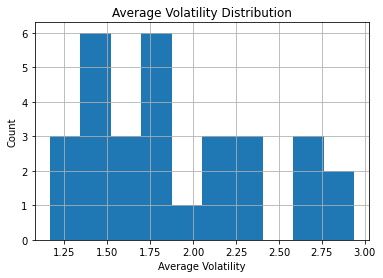

In [28]:
_ = dji_avg_volatility.hist()
plt.xlabel('Average Volatility')
plt.ylabel('Count')
plt.title("Average Volatility Distribution")

### Analysis: Correlation between Stocks 

In [ ]:
# Analysed trends in the markets

In [29]:
stock_names = dji1.stock.unique()

In [30]:
day_prices = dji1[dji1.date == dji1.date.min()].close

In [31]:
price_mapping = {n : c for n, c in zip(stock_names, day_prices)}

In [32]:
base_mapping = np.array(list(map(lambda x : price_mapping[x], dji1['stock'].values)))

In [33]:
dji1['growth'] = dji1['close'] / base_mapping - 1

In [34]:
dji1.growth.describe()

count    750.000000
mean       0.026788
std        0.082467
min       -0.288031
25%       -0.009590
50%        0.035772
75%        0.083261
max        0.231303
Name: growth, dtype: float64

In [35]:
worst_stocks = dji1[dji1.date == dji1.date.max()].sort_values('growth').head(5)

In [36]:
best_stocks = dji1[dji1.date == dji1.date.max()].sort_values('growth', ascending=False).head(5)

In [37]:
ws = worst_stocks.stock.values

In [38]:
bs = best_stocks.stock.values

In [39]:
dji2 = dji1.copy()

In [40]:
dji2['date'] = pd.to_datetime(dji2['date'])

In [41]:
dji2 = dji2.set_index('date')

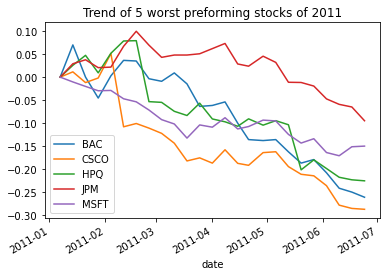

In [42]:
_ = dji2[dji2.stock.isin(ws)].groupby('stock').growth.plot(title='Trend of 5 worst preforming stocks of 2011', legend=True)

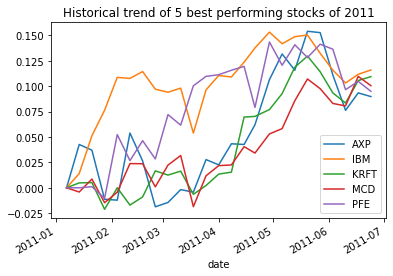

In [43]:
_ = dji2[dji2.stock.isin(bs)].groupby('stock').growth.plot(title='Historical trend of 5 best performing stocks of 2011', legend=True)

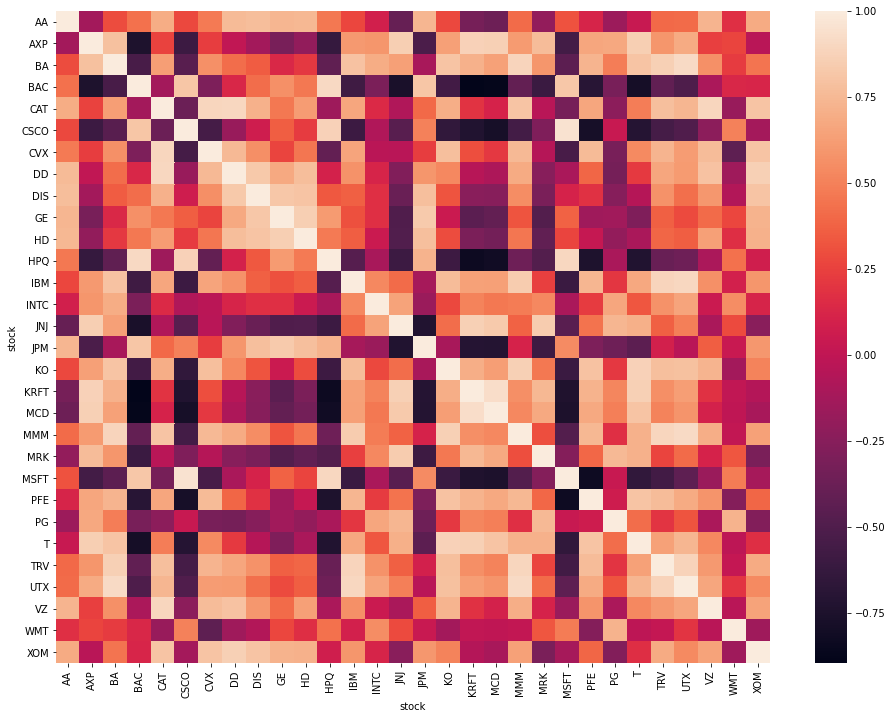

In [44]:
f, ax = plt.subplots(figsize=(16, 12))
corr = dji1.pivot('date', 'stock', 'growth').corr()
_ = sns.heatmap(corr)

In [45]:
# Defining function for correlation
def unique_corelations(indices):
    mapping = {}
    for record in indices:
        (stock_a, stock_b) = record
        value_list = mapping.get(stock_a)
        if value_list:
            if stock_b not in value_list:
                value_list.append(stock_b)
                mapping.update({stock_a: value_list})
        else:
            mapping.update({stock_a: [stock_b]})

    return mapping

def filter_corelations_positive(corr, threshold=0.9):
    indices = np.where(corr > threshold)
    indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    mapping = unique_corelations(indices)
    return mapping
    
def filter_corelations_negative(corr, threshold=-0.8):
    indices = np.where(corr < threshold)
    indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    mapping = unique_corelations(indices)
    return mapping

In [46]:
# Return stock that have a positive correlation value of .75
filter_corelations_positive(corr, 0.75)

{'AA': ['DD', 'DIS'],
 'AXP': ['BA', 'JNJ', 'KRFT', 'MCD', 'MRK', 'T'],
 'BA': ['IBM', 'KO', 'MMM', 'T', 'TRV', 'UTX'],
 'BAC': ['CSCO', 'HPQ', 'JPM', 'MSFT'],
 'CAT': ['CVX', 'DD', 'MMM', 'TRV', 'VZ', 'XOM'],
 'CSCO': ['HPQ', 'MSFT'],
 'CVX': ['DD', 'KO', 'MMM', 'PFE', 'VZ', 'XOM'],
 'DD': ['DIS', 'HD', 'VZ', 'XOM'],
 'DIS': ['GE', 'HD', 'JPM', 'XOM'],
 'GE': ['HD', 'JPM'],
 'HD': ['JPM'],
 'HPQ': ['MSFT'],
 'IBM': ['KO', 'MMM', 'TRV', 'UTX'],
 'JNJ': ['KRFT', 'MCD', 'MRK'],
 'KO': ['MMM', 'PFE', 'T', 'TRV', 'UTX'],
 'KRFT': ['MCD', 'T'],
 'MCD': ['T'],
 'MMM': ['TRV', 'UTX'],
 'PFE': ['T', 'TRV'],
 'TRV': ['UTX']}

In [47]:
# Return stock that have a negative correlation value of -.75
filter_corelations_negative(corr, -0.75)

{'BAC': ['JNJ', 'KRFT', 'MCD', 'T'],
 'CSCO': ['MCD', 'PFE'],
 'HPQ': ['KRFT', 'MCD'],
 'MCD': ['MSFT'],
 'MSFT': ['PFE']}

### Analysis: Single Stocks

In [48]:
# Analysis for single stock
variable = WMT

In [49]:
variable.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,volatility
date,,,,,,,,,,,,,,,,
2011-01-07,1,WMT,54.23,55.07,53.76,54.08,64231179,-0.276600,1.591844,6.343429e+07,53.65,54.81,2.162160,61,0.684172,0.276600
2011-01-14,1,WMT,53.65,55.36,53.54,54.81,48929455,2.162160,-23.822891,6.423118e+07,55.11,55.73,1.125020,54,0.675059,2.162160
2011-01-21,1,WMT,55.11,56.27,54.71,55.73,53009787,1.125020,8.339214,4.892946e+07,55.39,56.70,2.365050,47,0.663915,1.125020
2011-01-28,1,WMT,55.39,57.90,55.30,56.70,69546259,2.365050,31.195130,5.300979e+07,56.45,56.03,-0.744021,40,0.652557,2.365050
2011-02-04,1,WMT,56.45,56.58,55.39,56.03,60981950,-0.744021,-12.314550,6.954626e+07,56.07,55.69,-0.677724,33,0.660361,0.744021


In [50]:
variable.describe()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,volatility
count,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.520000,53.872400,54.744000,53.158400,53.912800,5.572143e+07,0.079834,5.236211,5.523470e+07,53.796000,53.890000,0.181876,42.840000,0.686841,1.165025
std,0.509902,1.426547,1.474271,1.384208,1.555639,1.457589e+07,1.520859,33.523368,1.407904e+07,1.457409,1.557263,1.580366,23.610873,0.019788,0.951743
min,1.000000,51.730000,52.520000,50.970000,51.520000,2.307349e+07,-3.828280,-49.470040,2.307349e+07,51.730000,51.520000,-3.828280,5.000000,0.652557,0.108932
25%,1.000000,52.540000,53.700000,51.890000,52.540000,4.715904e+07,-0.575436,-15.527342,4.715904e+07,52.350000,52.540000,-0.575436,26.000000,0.669199,0.439686
50%,2.000000,53.810000,55.070000,53.040000,53.660000,5.300979e+07,-0.108932,-1.039709,5.300979e+07,53.650000,53.580000,0.217155,47.000000,0.689527,0.744021
75%,2.000000,55.080000,55.790000,54.350000,55.290000,6.423118e+07,1.125020,17.448141,6.343429e+07,55.080000,55.290000,1.198530,61.000000,0.704225,1.922340
max,2.000000,56.450000,57.900000,55.390000,56.700000,9.269691e+07,2.574630,104.386254,9.269691e+07,56.450000,56.700000,2.574630,89.000000,0.718168,3.828280


<AxesSubplot:xlabel='date'>

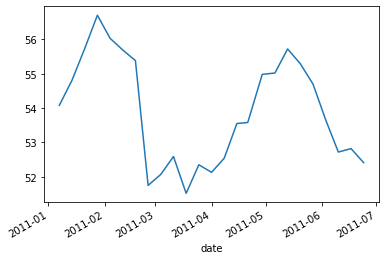

In [51]:
variable['close'].plot(style = ['-'])

<AxesSubplot:>

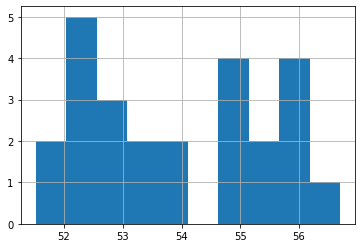

In [52]:
variable['close'].hist()

In [53]:
np.mean(variable['percent_change_price'])

0.07983403999999993

<AxesSubplot:xlabel='date'>

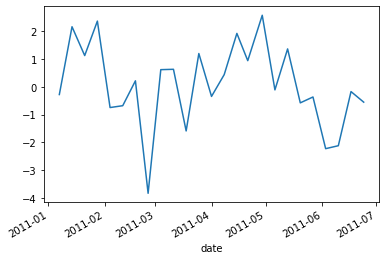

In [54]:
variable['percent_change_price'].plot(style = ['-'])

<AxesSubplot:xlabel='date'>

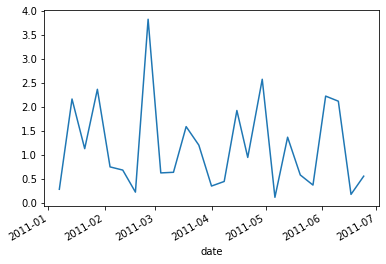

In [55]:
variable['volatility'].plot(style = ['-'])

<AxesSubplot:ylabel='Density'>

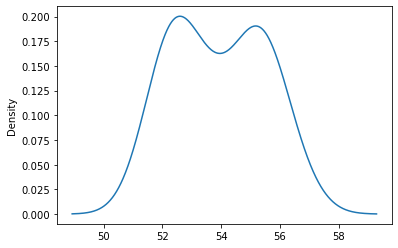

In [56]:
variable['close'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

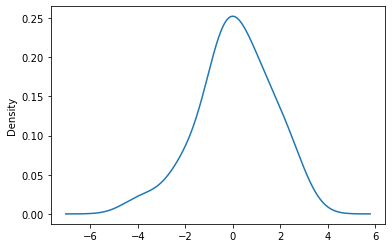

In [57]:
variable['percent_change_price'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

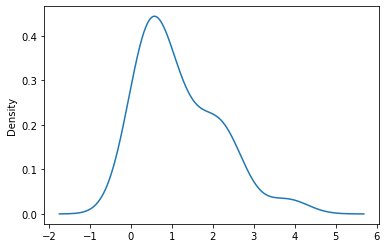

In [58]:
variable['volatility'].plot(kind = 'kde')

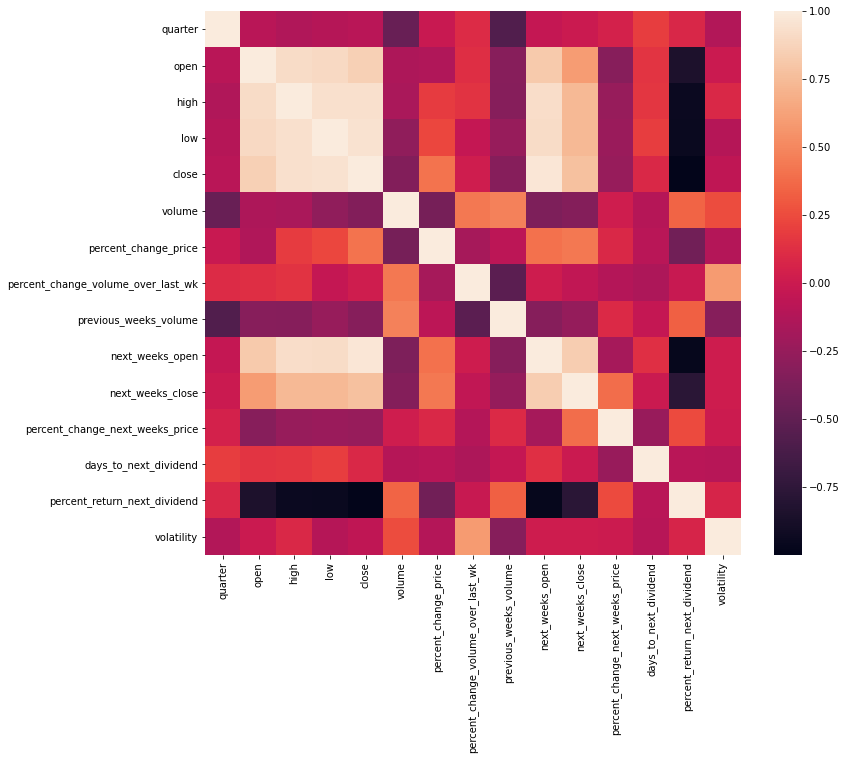

In [59]:
plt.subplots(figsize=(12,10))
sns.heatmap(variable.corr());

In [60]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'close', data=variable, alpha=0.5)
        ax.set(xlabel=col, ylabel='Closing Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [61]:
features = [i for i in variable.columns if i not in ['quarter','stock','close']]

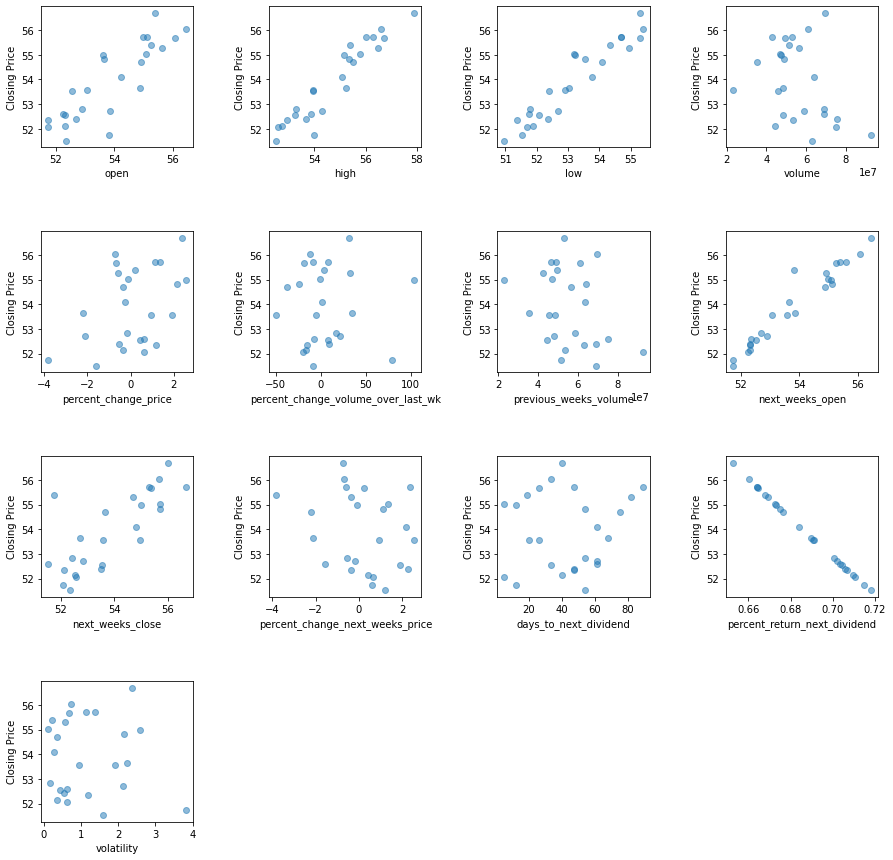

In [62]:
scatterplots(features, ncol=4, figsize=(15, 15))

Summary: 
* We look at the statistics of the DJI 30
* Looked at correlation between the stocks
* Which feature has an impact on closing price


Final Thoughts:
* I think that I need to learn more about working with Time Series with Python, which will be for a future lesson.
* The individual features doesn't seem like it is much help in predicting the close price
* When I get to the Time Series section, I will better understand how to do things like AR, MA, ARIMA, etc. to better process the data for furtur use.